In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [26]:
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32
import os
os.chdir("/Users/vedantwalia/Desktop/Projects sandbox/potato-disease-classification")

We will use image_dataset_from_directory api to load all images in tensorflow dataset: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

In [41]:
df = tf.keras.preprocessing.image_dataset_from_directory(
    "test_images",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

print('Class names:', df.class_names)

Found 2152 files belonging to 3 classes.
Class names: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [37]:
class_names = df.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [38]:
len(df)

68

In [39]:
for image_batch, labels_batch in df.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 0 1 0 0 1 0 1 1 1 2 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1]


2026-01-01 18:53:26.654924: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


As we can see above, each element in the dataset is a tuple. First element is a batch of 32 elements of images. Second element is a batch of 32 elements of class labels

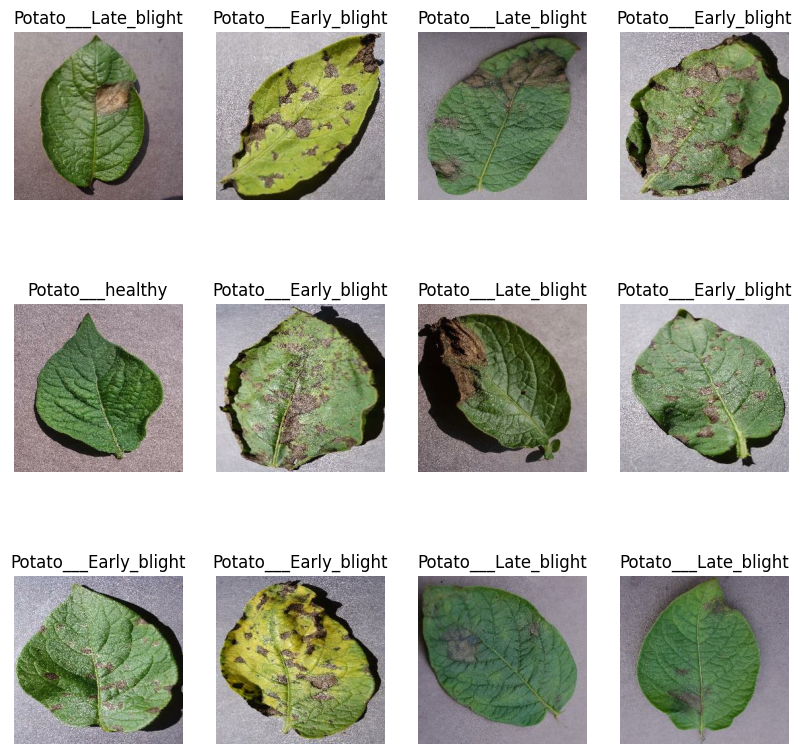

In [40]:
plt.figure(figsize=(10, 10))    
for image_batch, label_batch in df.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

Dataset is to be bifurcated into 3 subsets, namely:

- Training: Dataset to be used while training
- Validation: Dataset to be tested against while training
- Test: Dataset to be tested against after we trained a model


In [43]:
len(df)

68